## Multiple Linear Regression

The input is a n-dimentional feature and the output is a scalar

#### Importing Necessary Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### Understanding the dataset

Dataset Download link: [House Data](https://drive.google.com/file/d/1egiHml4ZA5wPkmTqcFQwsWYrIg1S-uuS/view?usp=drive_link)

In [2]:
house_data = pd.read_csv("../datasets/house_dataset.csv")

In [3]:
print("Shape of the data:", house_data.shape)

Shape of the data: (4000, 4)


In [4]:
house_data.head()

,Area,Bedrooms,Age,Price
0,1460,2,10,232296
1,4372,6,32,744779
2,3692,3,28,619921
3,1066,1,38,153884
4,4044,6,11,724914


In [7]:
# finding the correlation with the target variable

house_data.corr()

,Area,Bedrooms,Age,Price
Area,1.000000,0.872440,-0.017889,0.986071
Bedrooms,0.872440,1.000000,-0.020315,0.894323
Age,-0.017889,-0.020315,1.000000,-0.084124
Price,0.986071,0.894323,-0.084124,1.000000


We can observe that, 

Individually, 'Area' and 'Bedrooms' are highly correlated with 'Price'

Age has no relation with Price

#### Observing the Relation between variables

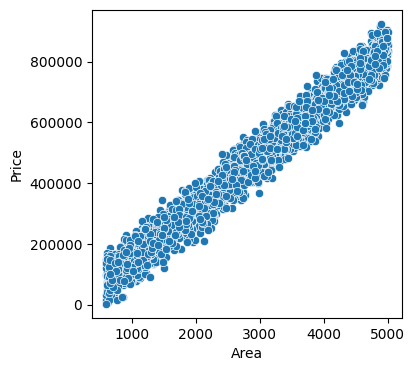

In [13]:
plt.figure(figsize=(4,4))
sns.scatterplot(house_data, x='Area', y='Price')
plt.show()

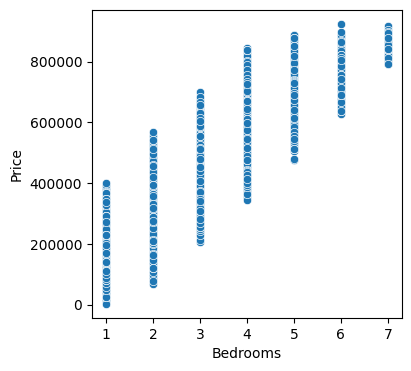

In [15]:
plt.figure(figsize=(4,4))
sns.scatterplot(house_data, x='Bedrooms', y='Price')
plt.show()

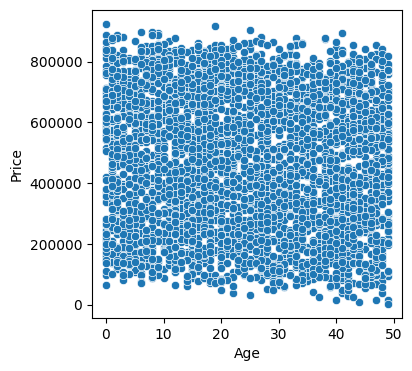

In [16]:
plt.figure(figsize=(4,4))
sns.scatterplot(house_data, x='Age', y='Price')
plt.show()

We can observe the no relation with age to price alonely

We can observe the variation of prices in a certain count of bedrooms

But we can also observe that, as the number of bedrooms increases the price also increases

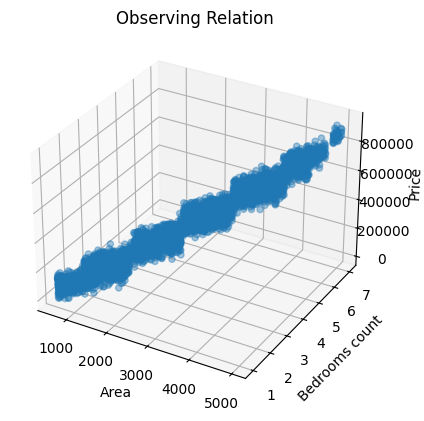

In [14]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter(house_data['Area'], house_data['Bedrooms'], house_data['Price'], alpha=0.4)
ax.set_xlabel("Area")
ax.set_ylabel("Bedrooms count")
ax.set_zlabel("Price")
ax.set_title("Observing Relation")
plt.show()

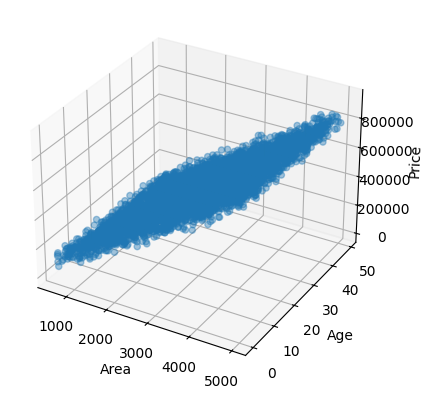

In [17]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter(house_data['Area'], house_data['Age'], house_data['Price'], alpha=0.4)
ax.set_xlabel("Area")
ax.set_ylabel("Age")
ax.set_zlabel("Price")
plt.show()

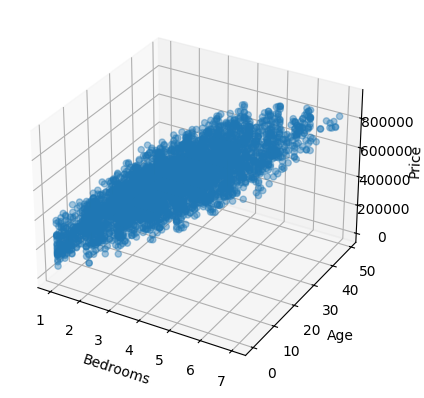

In [18]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter(house_data['Bedrooms'], house_data['Age'], house_data['Price'], alpha=0.4)
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Age")
ax.set_zlabel("Price")
plt.show()

#### Building the Linear Regresison Model

In [40]:
X = house_data.drop('Price', axis =1)
y = house_data['Price']


x_train, x_test, y_trian, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(f"Train size: {x_train.shape[0]}")
print(f"Test size: {x_test.shape[0]}")

Train size: 3200
Test size: 800


In [42]:
# fitting the model

model = LinearRegression()
model.fit(x_train, y_trian)

LinearRegression()

##### Train and Test errors

In [22]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_error = mean_squared_error(y_train_pred, y_trian)
test_error = mean_squared_error(y_test, y_test_pred)

In [23]:
print(f"Train error is: {train_error}")
print(f"Test error is : {test_error}")

Train error is: 886224521.3900892
Test error is : 918155819.852024


We can observe that, train and test error both are high

so model is underfitted

##### Getting the weights and plotting the plane

In [25]:
print(f"Model weights: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

Model weights: [  151.37820154 19107.76197012 -1053.25619365]
Model intercept: -29.574532680097036


In [29]:
# for plotting, we consider 3D plotting, so we take only 2 input features and make the plot

X = house_data.drop(['Age', 'Price'], axis=1)
y = house_data['Price']


model = LinearRegression()
model.fit(X, y)


weights = model.coef_
intercept = model.intercept_

print(f"Weights: {weights}")
print(f"Intercept: {intercept}")

Weights: [  151.42163537 19374.96722962]
Intercept: -26363.933049045445


In [32]:
x_grid, y_grid = np.meshgrid(
    np.linspace(house_data['Area'].min(), house_data['Area'].max(), 20),
    np.linspace(house_data['Bedrooms'].min(), house_data['Bedrooms'].max(), 20)
)

z_vals = weights[0]*x_grid + weights[1]*y_grid + intercept

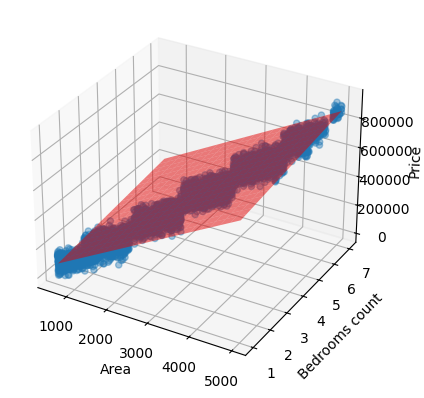

In [43]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter(house_data['Area'], house_data['Bedrooms'], house_data['Price'], alpha=0.4)
ax.plot_surface(x_grid, y_grid, z_vals, color = 'red', alpha = 0.5)
ax.set_xlabel("Area")
ax.set_ylabel("Bedrooms count")
ax.set_zlabel("Price")
plt.show()

In [49]:
# predict function to predict the prices of homes

def predict_price(Area: float, Age: float, Bedrooms_count: int, model) -> float:
    data = [[Area, Age, Bedrooms_count]]
    return model.predict(pd.DataFrame([[Area, Bedrooms_count, age]], columns=["Area", "Bedrooms", "Age"]))

area = float(input("Enter the Area in sq foot: "))
age = float(input("Enter the house age: "))
bedrooms = int(input("Enter number of bedrooms: "))

print(f"Predicted price is: {predict_price(area, age, bedrooms, model)[0]}")

Predicted price is: 406838.7611721618
